In [80]:
import pandas as pd
import numpy  as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [81]:
house = pd.read_csv('HousePrice.csv')
house.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,SalesPrice
0,5/2/14 0:00,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,313000.0
1,5/2/14 0:00,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2384000.0
2,5/2/14 0:00,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,342000.0
3,5/2/14 0:00,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,420000.0
4,5/2/14 0:00,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,550000.0


In [82]:
target  =  house['SalesPrice']
feature =  house.drop('SalesPrice',axis=  1)

In [83]:
feature.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement','yr_built', 'yr_renovated'
this are the features and  SalesPrice is the target variable 

In [84]:
house.shape

(4600, 14)

In [85]:
house.isnull().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
SalesPrice       0
dtype: int64

there are 4600 records and there are no missing values 

In [86]:
house.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,SalesPrice
count,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03
mean,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,5.519630e+05
std,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,5.638347e+05
min,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000e+00
25%,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,3.228750e+05
50%,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,4.609435e+05
75%,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,6.549625e+05
max,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,2.659000e+07


d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'sqft living')

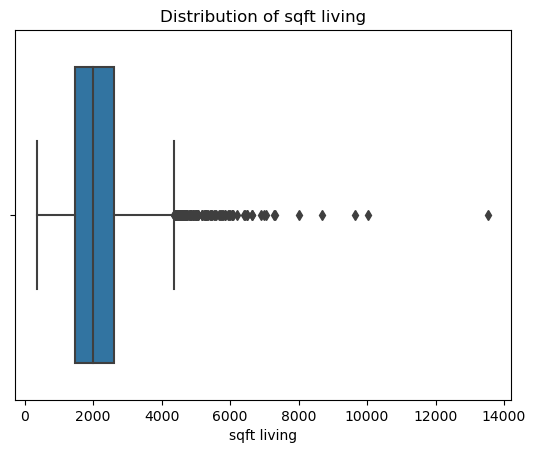

In [87]:
sns.boxplot(house['sqft_living'])
plt.title("Distribution of sqft living")
plt.xlabel('sqft living')


Text(0.5, 0, 'sqft lot')

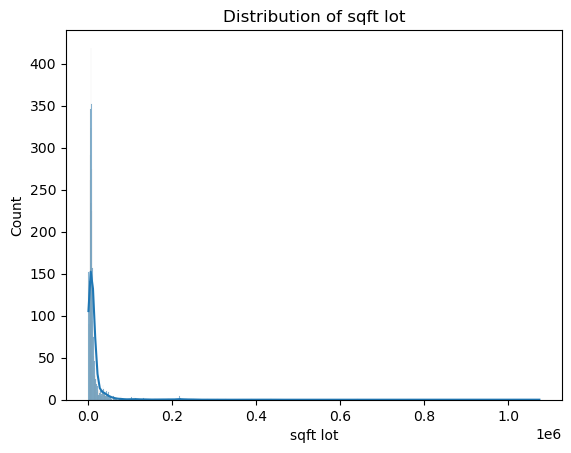

In [88]:
sns.histplot(house['sqft_lot'],kde=True)
plt.title("Distribution of sqft lot")
plt.xlabel('sqft lot')

Text(0.5, 0, 'floors')

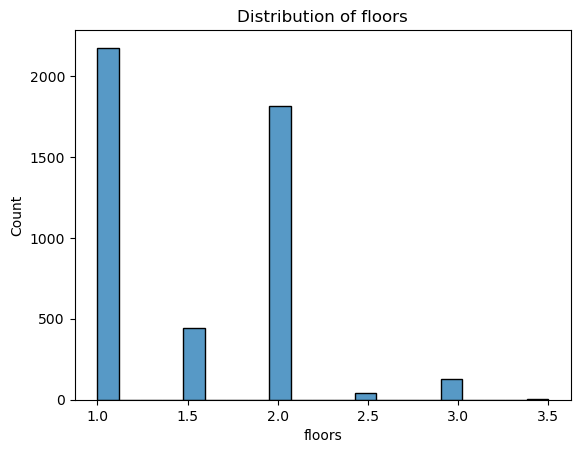

In [89]:
sns.histplot(house,x = 'floors')
plt.title("Distribution of floors")
plt.xlabel('floors')

Text(0.5, 0, 'SalesPrice')

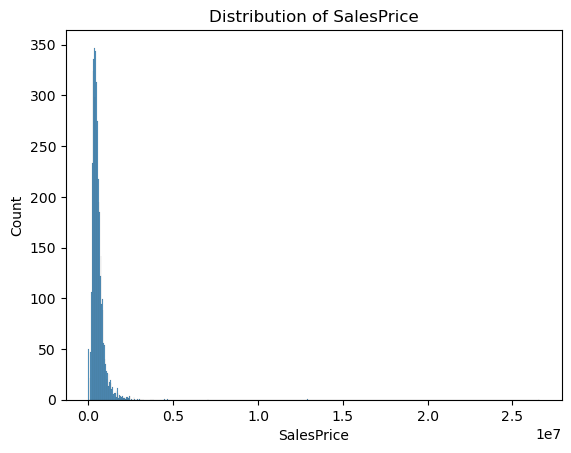

In [90]:
sns.histplot(house,x = 'SalesPrice')
plt.title("Distribution of SalesPrice")
plt.xlabel('SalesPrice')

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

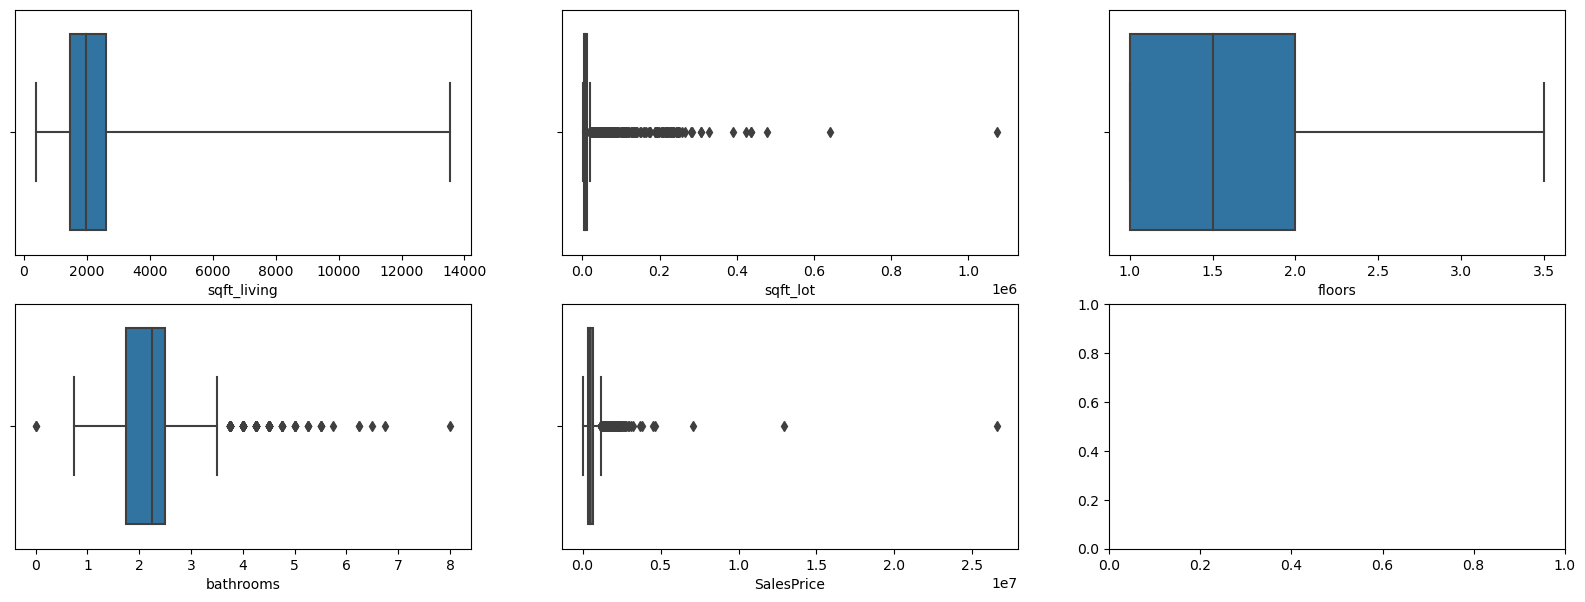

In [91]:
fig, axs = plt.subplots(2,3,figsize = (20,7))
plt1 = sns.boxplot(house['sqft_living'] , whis= 100000,ax = axs[0,0])
plt2 = sns.boxplot(house['sqft_lot'], ax = axs[0,1])
plt3 = sns.boxplot(house['floors'], ax = axs[0,2])
plt1 = sns.boxplot(house['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(house['SalesPrice'], ax = axs[1,1])

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test  = train_test_split(house['sqft_lot'],house['SalesPrice'],random_state=45)

# as we have only 1 feature so we need to rehape it 
x_train = x_train.to_numpy()
x_train = x_train.reshape(-1,1)

x_test = x_test.to_numpy()
x_test = x_test.reshape(-1,1)

model  = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [113]:
coef = pd.DataFrame(model.coef_,['SalesPrice'],columns=['Coefficient'])
coef

,Coefficient
SalesPrice,0.787479


In [114]:
intercept = pd.DataFrame(model.intercept_,['SalesPrice'],columns=['Intercept'])
intercept

,Intercept
SalesPrice,547480.597128


In [110]:

y_pred = model.predict(x_train)

errors = np.square(np.subtract(y_train, y_pred))

# Sum the errors
sum_of_errors = np.sum(errors)

print ("sum_of_errors is {}".format(sum_of_errors))

sum_of_errors is 1331318910998174.8
